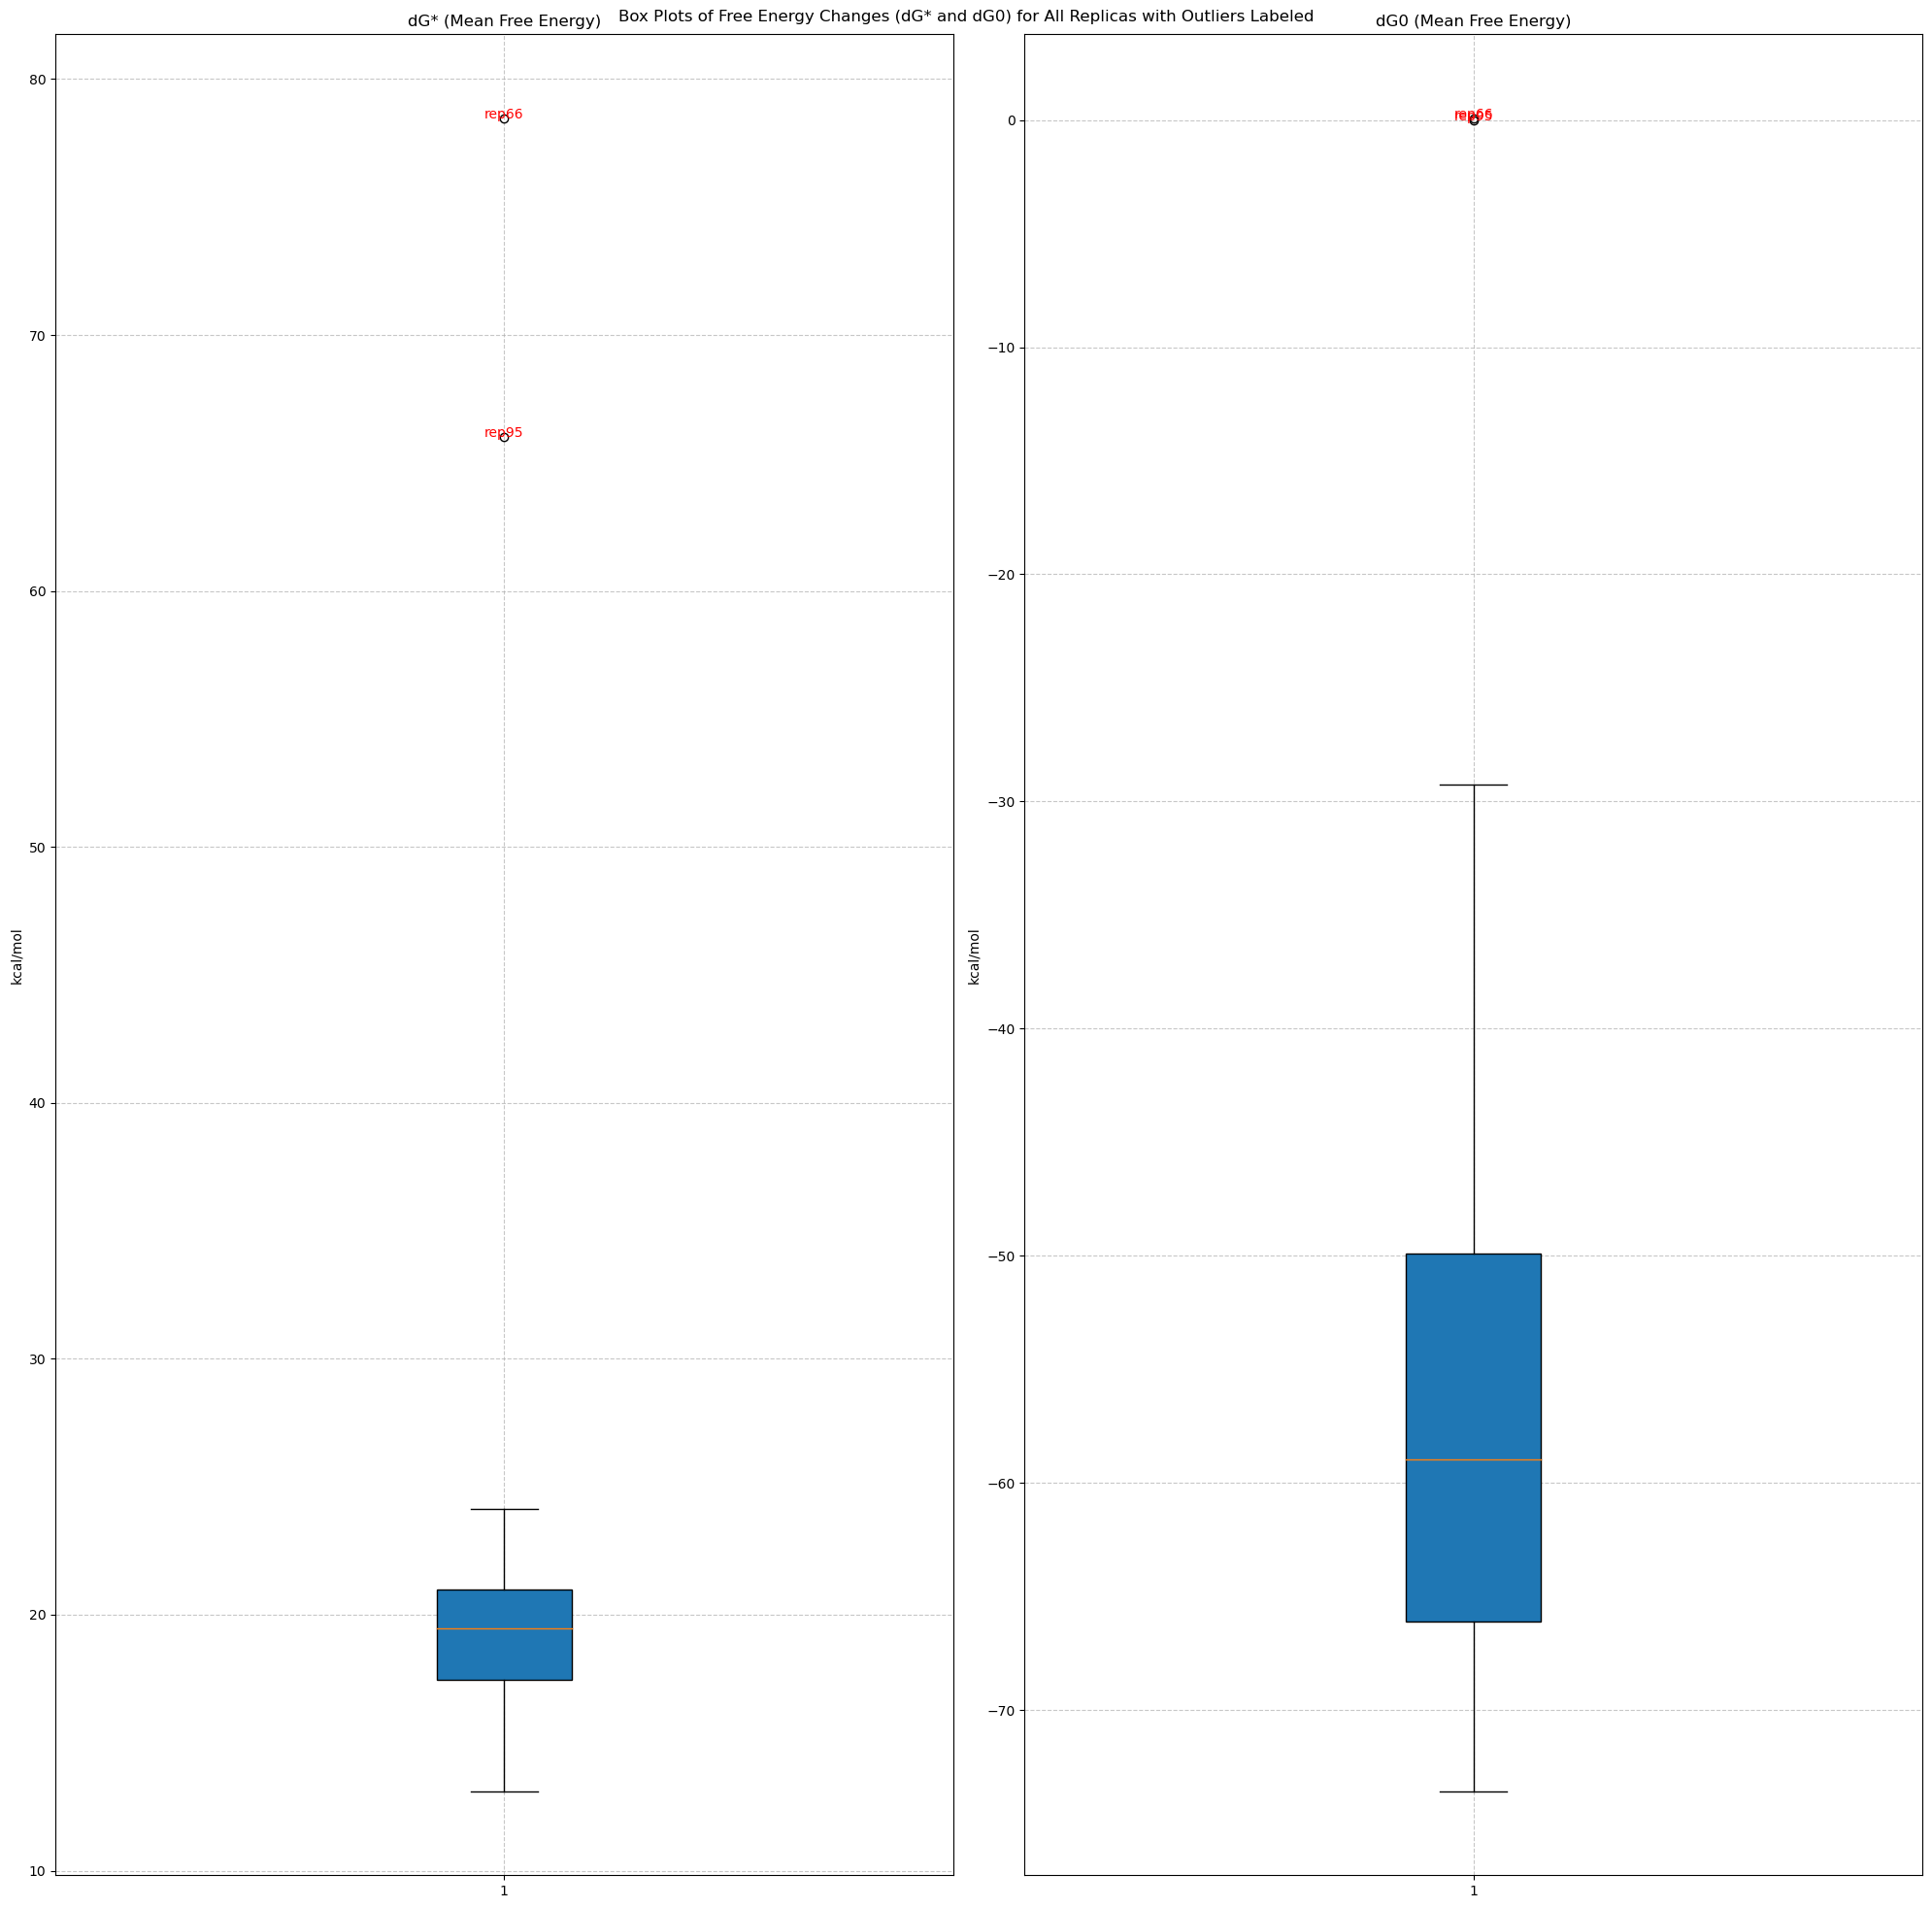

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Read LaTeX table file
filename = "/home/hp/results/mousecys/WT/combined_latex_table.tex"

# Define a list to hold each row as a dictionary for the dataframe
data = []

# Use regex to extract each row of the table from the LaTeX file
with open(filename, 'r') as file:
    for line in file:
        # Match lines containing data in the format "repX & value +- error kcal/mol & value +- error kcal/mol \\"
        match = re.match(r'rep(\d+) & ([\d\.\-nan]+) \+\- [\d\.\-nan]+ kcal/mol & ([\d\.\-nan]+) \+\- [\d\.\-nan]+ kcal/mol \\\\', line)
        if match:
            # Extract replica number, dG* and dG0 values
            replica = int(match.group(1))
            dg_star = float(match.group(2)) if match.group(2) != 'nan' else np.nan
            dg0 = float(match.group(3)) if match.group(3) != 'nan' else np.nan
            data.append({"Replica": f"rep{replica}", "dG_star": dg_star, "dG0": dg0})

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to detect outliers in a series
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

# Identify outliers for dG* and dG0
dg_star_outliers = find_outliers(df['dG_star'])
dg0_outliers = find_outliers(df['dG0'])

# Plot box plots for dG* and dG0
fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot boxplot for dG* with outliers labeled
axes[0].boxplot(df['dG_star'].dropna(), vert=True, patch_artist=True)
axes[0].set_title('dG* (Mean Free Energy)')
axes[0].set_ylabel('kcal/mol')
axes[0].grid(True, linestyle='--', alpha=0.7)
for idx, value in dg_star_outliers.items():
    axes[0].text(1, value, df['Replica'][idx], ha='center', color='red')

# Plot boxplot for dG0 with outliers labeled
axes[1].boxplot(df['dG0'].dropna(), vert=True, patch_artist=True)
axes[1].set_title('dG0 (Mean Free Energy)')
axes[1].set_ylabel('kcal/mol')
axes[1].grid(True, linestyle='--', alpha=0.7)
for idx, value in dg0_outliers.items():
    axes[1].text(1, value, df['Replica'][idx], ha='center', color='red')

plt.suptitle("Box Plots of Free Energy Changes (dG* and dG0) for All Replicas with Outliers Labeled")
plt.tight_layout()
plt.show()
